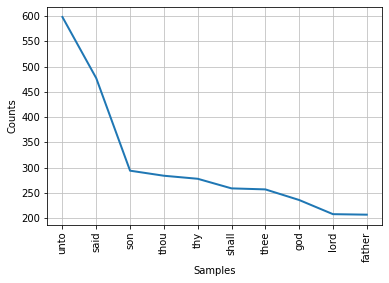

In [35]:
from nltk.corpus import stopwords # Import the stop word list
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import brown
from bs4 import BeautifulSoup
from nltk.book import *
import pandas as pd
import os
import re
import xml.etree.ElementTree as et 
import matplotlib.pyplot as plt
import sklearn

stemmer = SnowballStemmer('english')
lemmer = WordNetLemmatizer()



def Description_to_words(raw_Description):
    Description_text = BeautifulSoup(raw_Description).get_text()     
    letters_only = re.sub("[^\w\s]", " ", Description_text) 
    words = word_tokenize(letters_only.lower())                  
    stops = set(stopwords.words("english")) 
    meaningful_words = [w for w in words if not w in stops]   
    return ' '.join([lemmer.lemmatize(w) for w in meaningful_words])
text_clean = Description_to_words(str(text3[:]))
fdist1 = FreqDist(text_clean.split(' '))
fdist1.plot(10)





Test avec Tweets

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

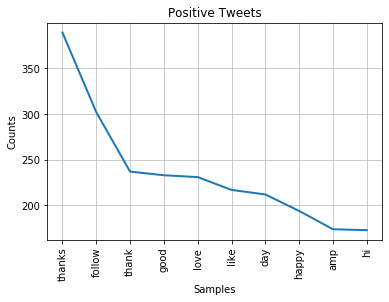

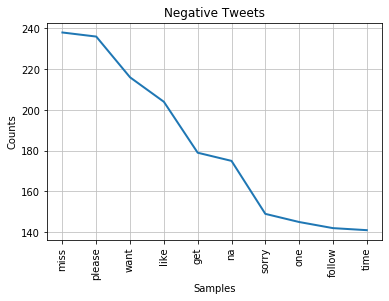

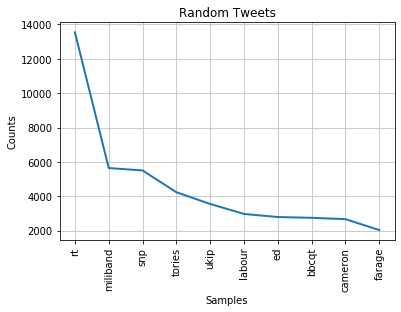

In [33]:
from nltk.corpus import twitter_samples

stemmer = SnowballStemmer('english')
lemmer = WordNetLemmatizer()


stopwords_tweets = stopwords.words("english")
stopwords_tweets.extend(["http","https","co","u","n"])


def Description_to_words_tweets(raw_Description):   
    letters_only = re.sub("[^\w\s]", " ", raw_Description) 
    words = word_tokenize(letters_only.lower())                 
    stops = set(stopwords_tweets)
    meaningful_words = [w for w in words if not w in stops]   
    return meaningful_words


print(twitter_samples.fileids())

strings_pos = twitter_samples.strings('positive_tweets.json')

strings_neg = twitter_samples.strings('negative_tweets.json')
strings_rand = twitter_samples.strings('tweets.20150430-223406.json')
text_clean_pos = Description_to_words_tweets(str(strings_pos[:]))
text_clean_neg= Description_to_words_tweets(str(strings_neg[:]))
text_clean_rand = Description_to_words_tweets(str(strings_rand[:]))

#fdist1_pos = FreqDist(text_clean_pos.split(' '))
#fdist1_neg = FreqDist(text_clean_neg.split(' '))
#fdist1_rand = FreqDist(text_clean_rand.split(' '))

text_pos = []
for tweet in strings_pos :
    text_pos.extend(tweet.split(' '))
    
text_neg = []
for tweet in strings_neg :
    text_neg.extend(tweet.split(' '))

text_rand = []
for tweet in strings_rand :
    text_rand.extend(tweet.split(' '))

fdist1_pos = FreqDist(text_clean_pos)
fdist1_neg = FreqDist(text_clean_neg)
fdist1_rand = FreqDist(text_clean_rand)

plt.figure()
plt.title("Positive Tweets")
fdist1_pos.plot(10)
plt.title("Negative Tweets")
fdist1_neg.plot(10)
plt.title("Random Tweets")
fdist1_rand.plot(10)

Test 20News

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

News = sklearn.datasets.fetch_20newsgroups(subset='train')
categories = News.target_names
news_by_category = {}
for category in categories :
    next_news = sklearn.datasets.fetch_20newsgroups(subset='train',categories=[category])
    news_by_category[category] = next_news.data


total_text = ''

    


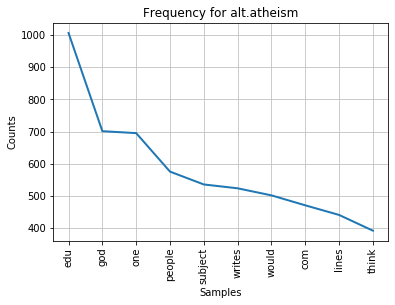

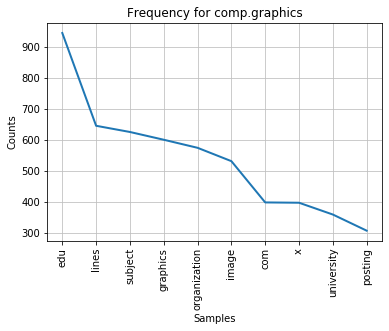

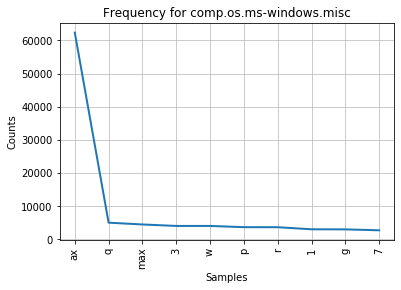

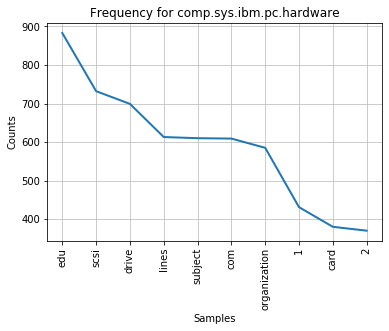

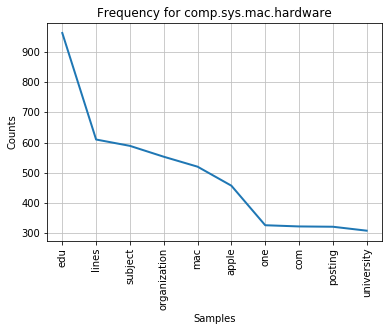

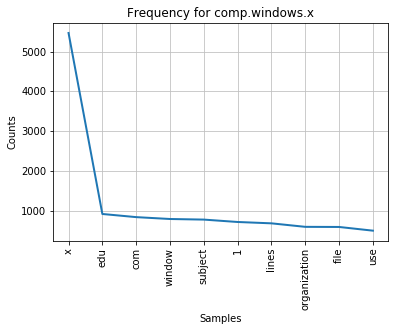

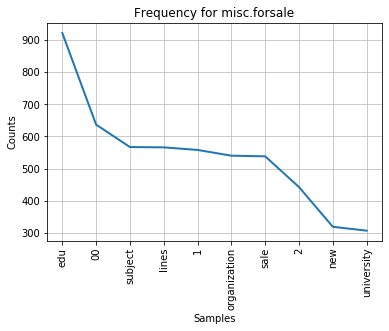

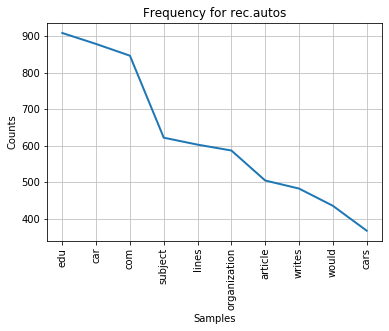

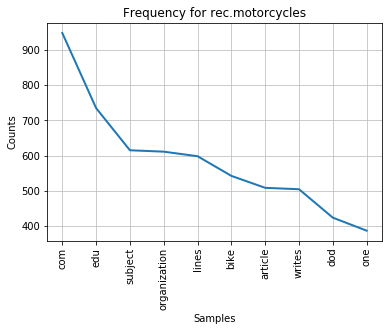

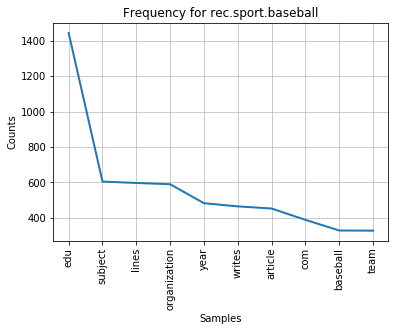

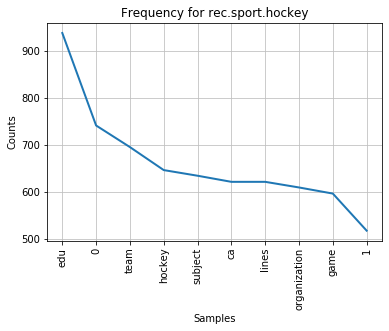

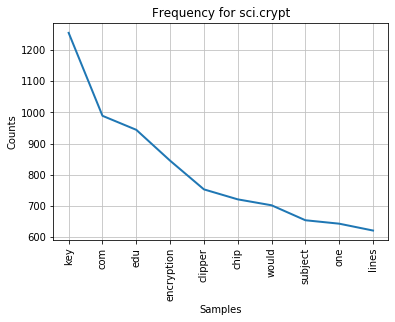

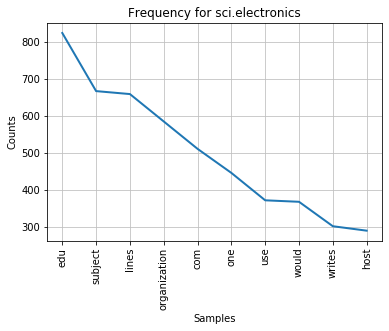

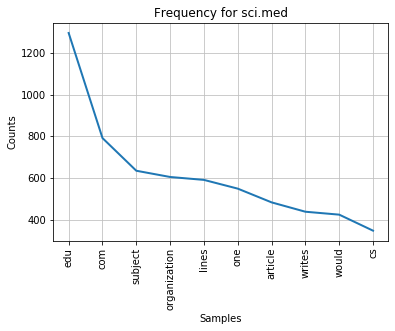

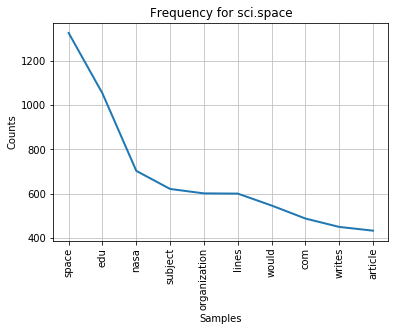

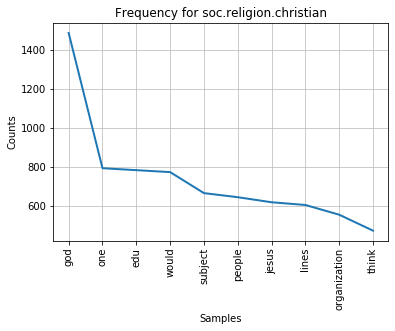

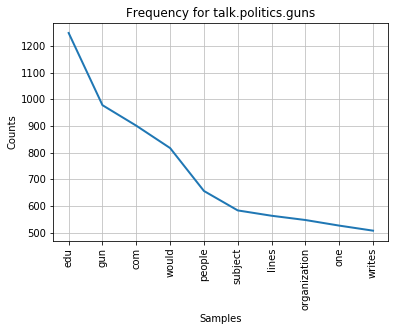

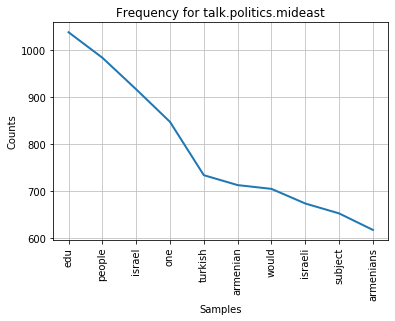

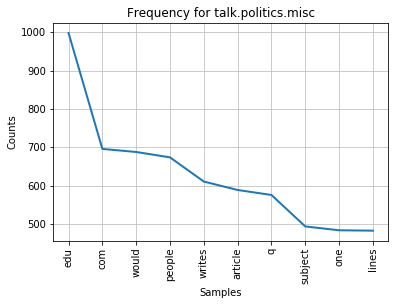

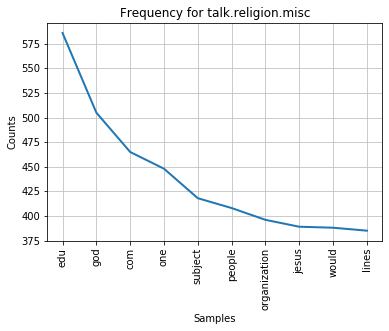

In [83]:
def Description_to_words_news(raw_Description):
    Description_text = BeautifulSoup(raw_Description).get_text()
    letters_only = re.sub(" \d+", " ", Description_text)
    letters_only = letters_only.replace('\\n',' ')
    letters_only = re.sub("[^\w\s]", " ", letters_only) 
    words = word_tokenize(letters_only.lower())                  
    stops = set(stopwords.words("english")) 
    meaningful_words = [w for w in words if not w in stops]   
    return meaningful_words

for key in news_by_category.keys():
    text = Description_to_words_news(str(news_by_category[key]))
    fdist1 = FreqDist(text)
    plt.figure()
    plt.title("Frequency for " + key)
    fdist1.plot(10)